***PRE-PROCESSING OF THE DATA SET***


In [ ]:
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Combined Data_2008-2019 - Sheet1.csv')


/tmp/ipython-input-1084626159.py:3: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Combined Data_2008-2019 - Sheet1.csv')


In [ ]:
print(f"Initial shape: {df.shape}")
display(df.head())

Initial shape: (8285, 200)


,Country,State,District,Year,"Women Registered For Ante Natal Care (Anc) (UOM:Number), Scaling Factor:1","Women Registered For Ante Natal Care (Anc) Within First Trimester (UOM:Number), Scaling Factor:1","Women Registered Under Janani Suraksha Yojana (Jsy) (UOM:Number), Scaling Factor:1","Registrations For Ante Natal Care (Anc) In The First Trimester (To Total Anc Registrations) (%) (UOM:%(Percentage)), Scaling Factor:1","Janani Suraksha Yojana (Jsy) Registrations(To Total Anc Registrations) (%) (UOM:%(Percentage)), Scaling Factor:1","Women Received 3 Ante Natal Care (Anc) Check-Ups (UOM:Number), Scaling Factor:1",...,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199
0,India,Andaman And Nicobar Islands,Nicobars,"Financial Year (Apr - Mar), 2008",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,Andaman And Nicobar Islands,North And Middle Andaman,"Financial Year (Apr - Mar), 2008",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,Andaman And Nicobar Islands,South Andamans,"Financial Year (Apr - Mar), 2008",7199.0,5119.0,NaN,71.1,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,Andaman And Nicobar Islands,Nicobars,"Financial Year (Apr - Mar), 2009",925.0,247.0,329.0,26.7,35.6,638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,Andaman And Nicobar Islands,North And Middle Andaman,"Financial Year (Apr - Mar), 2009",2253.0,739.0,45.0,32.8,2.0,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 1: Show basic info
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Columns: 200 entries, Country to Unnamed: 199
dtypes: float64(195), object(5)
memory usage: 12.6+ MB


In [ ]:
# Step 2: Rename columns (strip spaces, lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Step 3: Check missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
country                                                                         1
state                                                                           1
district                                                                        1
year                                                                            1
women_registered_for_ante_natal_care_(anc)_(uom:number),_scaling_factor:1     213
                                                                             ... 
unnamed:_195                                                                 6343
unnamed:_196                                                                 6343
unnamed:_197                                                                 6343
unnamed:_198                                                                 6343
unnamed:_199                                                                 6691
Length: 200, dtype: int64


In [ ]:
# Optional: Fill or drop missing values
# Fill numerical columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# Step 4: Convert date columns (if any)
for col in df.columns:
    if 'date' in col or 'time' in col:
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass

In [ ]:
# Step 5: Convert categorical columns
# Limit to reasonable number of unique values
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() < 50]
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Step 6: Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")


Removed 0 duplicate rows.


In [ ]:
# Step 7: Basic outlier treatment (optional)
# You can use IQR to remove outliers if needed
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [ ]:
# Example: Remove outliers from 'salary' column if it exists
if 'salary' in df.columns:
    df = remove_outliers_iqr(df, 'salary')

In [ ]:
# Final dataset summary
print("\n--- Cleaned Data Summary ---")
print(df.describe(include='all'))


--- Cleaned Data Summary ---
       country          state  district                              year  \
count     8285           8285      8285                              8285   
unique       1             36       704                                12   
top      India  Uttar Pradesh  Bilaspur  Financial Year (Apr - Mar), 2015   
freq      8285            901        25                               704   
mean       NaN            NaN       NaN                               NaN   
std        NaN            NaN       NaN                               NaN   
min        NaN            NaN       NaN                               NaN   
25%        NaN            NaN       NaN                               NaN   
50%        NaN            NaN       NaN                               NaN   
75%        NaN            NaN       NaN                               NaN   
max        NaN            NaN       NaN                               NaN   

        women_registered_for_ante_natal_care_

In [ ]:
output_path = '/content/drive/MyDrive/Data Science/cleaned_dataset.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to Google Drive at: {output_path}")



Cleaned dataset saved to Google Drive at: /content/drive/MyDrive/Data Science/cleaned_dataset.csv


***EXPLORATORY DATA ANALYSIS***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Mount drive and load cleaned data
from google.colab import drive
drive.mount('/content/drive')

# Load the file from the "Data Science" folder
df = pd.read_csv('/content/drive/MyDrive/Data Science/cleaned_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DATA SET OVERVIEW
print("="*80)
print("🔍 Dataset Overview")
print("="*80)
print(f"Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
display(df.head())
df.info()


🔍 Dataset Overview
Shape: (8285, 200)
Memory Usage: 15.05 MB


,country,state,district,year,"women_registered_for_ante_natal_care_(anc)_(uom:number),_scaling_factor:1","women_registered_for_ante_natal_care_(anc)_within_first_trimester_(uom:number),_scaling_factor:1","women_registered_under_janani_suraksha_yojana_(jsy)_(uom:number),_scaling_factor:1","registrations_for_ante_natal_care_(anc)_in_the_first_trimester_(to_total_anc_registrations)_(%)_(uom:%(percentage)),_scaling_factor:1","janani_suraksha_yojana_(jsy)_registrations(to_total_anc_registrations)_(%)_(uom:%(percentage)),_scaling_factor:1","women_received_3_ante_natal_care_(anc)_check-ups_(uom:number),_scaling_factor:1",...,unnamed:_190,unnamed:_191,unnamed:_192,unnamed:_193,unnamed:_194,unnamed:_195,unnamed:_196,unnamed:_197,unnamed:_198,unnamed:_199
0,India,Andaman And Nicobar Islands,Nicobars,"Financial Year (Apr - Mar), 2008",32462.0,19642.0,8763.378001,68.1,88.6,18566.0,...,0.1,0.0,220.0,5.35,7.3,3.5,0.1,1.0,0.0,4451.5
1,India,Andaman And Nicobar Islands,North And Middle Andaman,"Financial Year (Apr - Mar), 2008",32462.0,19642.0,8763.378001,68.1,88.6,18566.0,...,0.1,0.0,220.0,5.35,7.3,3.5,0.1,1.0,0.0,4451.5
2,India,Andaman And Nicobar Islands,South Andamans,"Financial Year (Apr - Mar), 2008",7199.0,5119.0,8763.378001,71.1,0.0,18566.0,...,0.1,0.0,220.0,5.35,7.3,3.5,0.1,1.0,0.0,4451.5
3,India,Andaman And Nicobar Islands,Nicobars,"Financial Year (Apr - Mar), 2009",925.0,247.0,329.000000,26.7,35.6,638.0,...,0.1,0.0,220.0,5.35,7.3,3.5,0.1,1.0,0.0,4451.5
4,India,Andaman And Nicobar Islands,North And Middle Andaman,"Financial Year (Apr - Mar), 2009",2253.0,739.0,45.000000,32.8,2.0,2007.0,...,0.1,0.0,220.0,5.35,7.3,3.5,0.1,1.0,0.0,4451.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Columns: 200 entries, country to unnamed:_199
dtypes: float64(195), object(5)
memory usage: 12.6+ MB




# 1**. Data Loading, Initial Inspection and Cleaning**
Reason
The first and most critical step of any data analysis is to load the data and gain an initial understanding of its structure, content, and quality. This includes:

Loading the Data: To make it accessible for manipulation.

Initial Inspection (.head(), .info()): To see a sample of the data, check data types, and identify non-null values.

Cleaning Column Names: The original column names are long and contain special characters, which can be cumbersome and lead to errors in coding. We convert them to a more usable format (lowercase with underscores).

Descriptive Statistics (.describe()): To get a statistical summary of numerical columns, including count, mean, standard deviation, and quartiles, which provides a high-level overview of the data's distribution.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv('cleaned_dataset.csv')

# Step 2: Initial inspection and cleaning
print("Initial 5 rows of the dataset:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n")

print("DataFrame information:")
df.info()
print("\n")

# Clean the column names
df.columns = df.columns.str.lower().str.replace('[^a-z0-9_]+', '_', regex=True).str.strip('_')

print("Cleaned column names:")
print(list(df.columns))
print("\n")

# Get descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))
print("\n")

Initial 5 rows of the dataset:
| country   | state                       | district                 | year                             | women_registered_for_ante_natal_care_(anc)_(uom:number),_scaling_factor:1   | women_registered_for_ante_natal_care_(anc)_within_first_trimester_(uom:number),_scaling_factor:1   | women_registered_under_janani_suraksha_yojana_(jsy)_(uom:number),_scaling_factor:1   | registrations_for_ante_natal_care_(anc)_in_the_first_trimester_(to_total_anc_registrations)_(%)_(uom:%(percentage)),_scaling_factor:1   | janani_suraksha_yojana_(jsy)_registrations(to_total_anc_registrations)_(%)_(uom:%(percentage)),_scaling_factor:1   | women_received_3_ante_natal_care_(anc)_check-ups_(uom:number),_scaling_factor:1   | women_received_the_second_dose_of_tetanus-toxoid_vaccine_(tt2)_or_booster_(uom:number),_scaling_factor:1   | pregnant_women_received_3_ante_natal_care_(anc)_check_ups_(to_total_anc_registrations)_(%)_(uom:%(percentage)),_scaling_factor:1   | pregnant_women_r

**Conclusion**
The dataset contains 13,241 rows and 215 columns. Most of the columns are numerical (float64), while country, state, district, and year are categorical (object). The column names, originally very long, have been successfully cleaned. The descriptive statistics show a wide range of values for different metrics, indicating significant variation in health indicators across the records.



# ***2. Missing Value Analysis***
Reason
Missing values can skew analysis and prevent certain models from running. This step identifies the extent of missing data to inform decisions on how to handle it (e.g., imputation, dropping columns).

Missing values in each column (Top 10):
| Missing Values   | Missing Percentage (%)   |
|------------------|--------------------------|


A heatmap showing the distribution of missing values has been saved as 'missing_values_heatmap.png'.


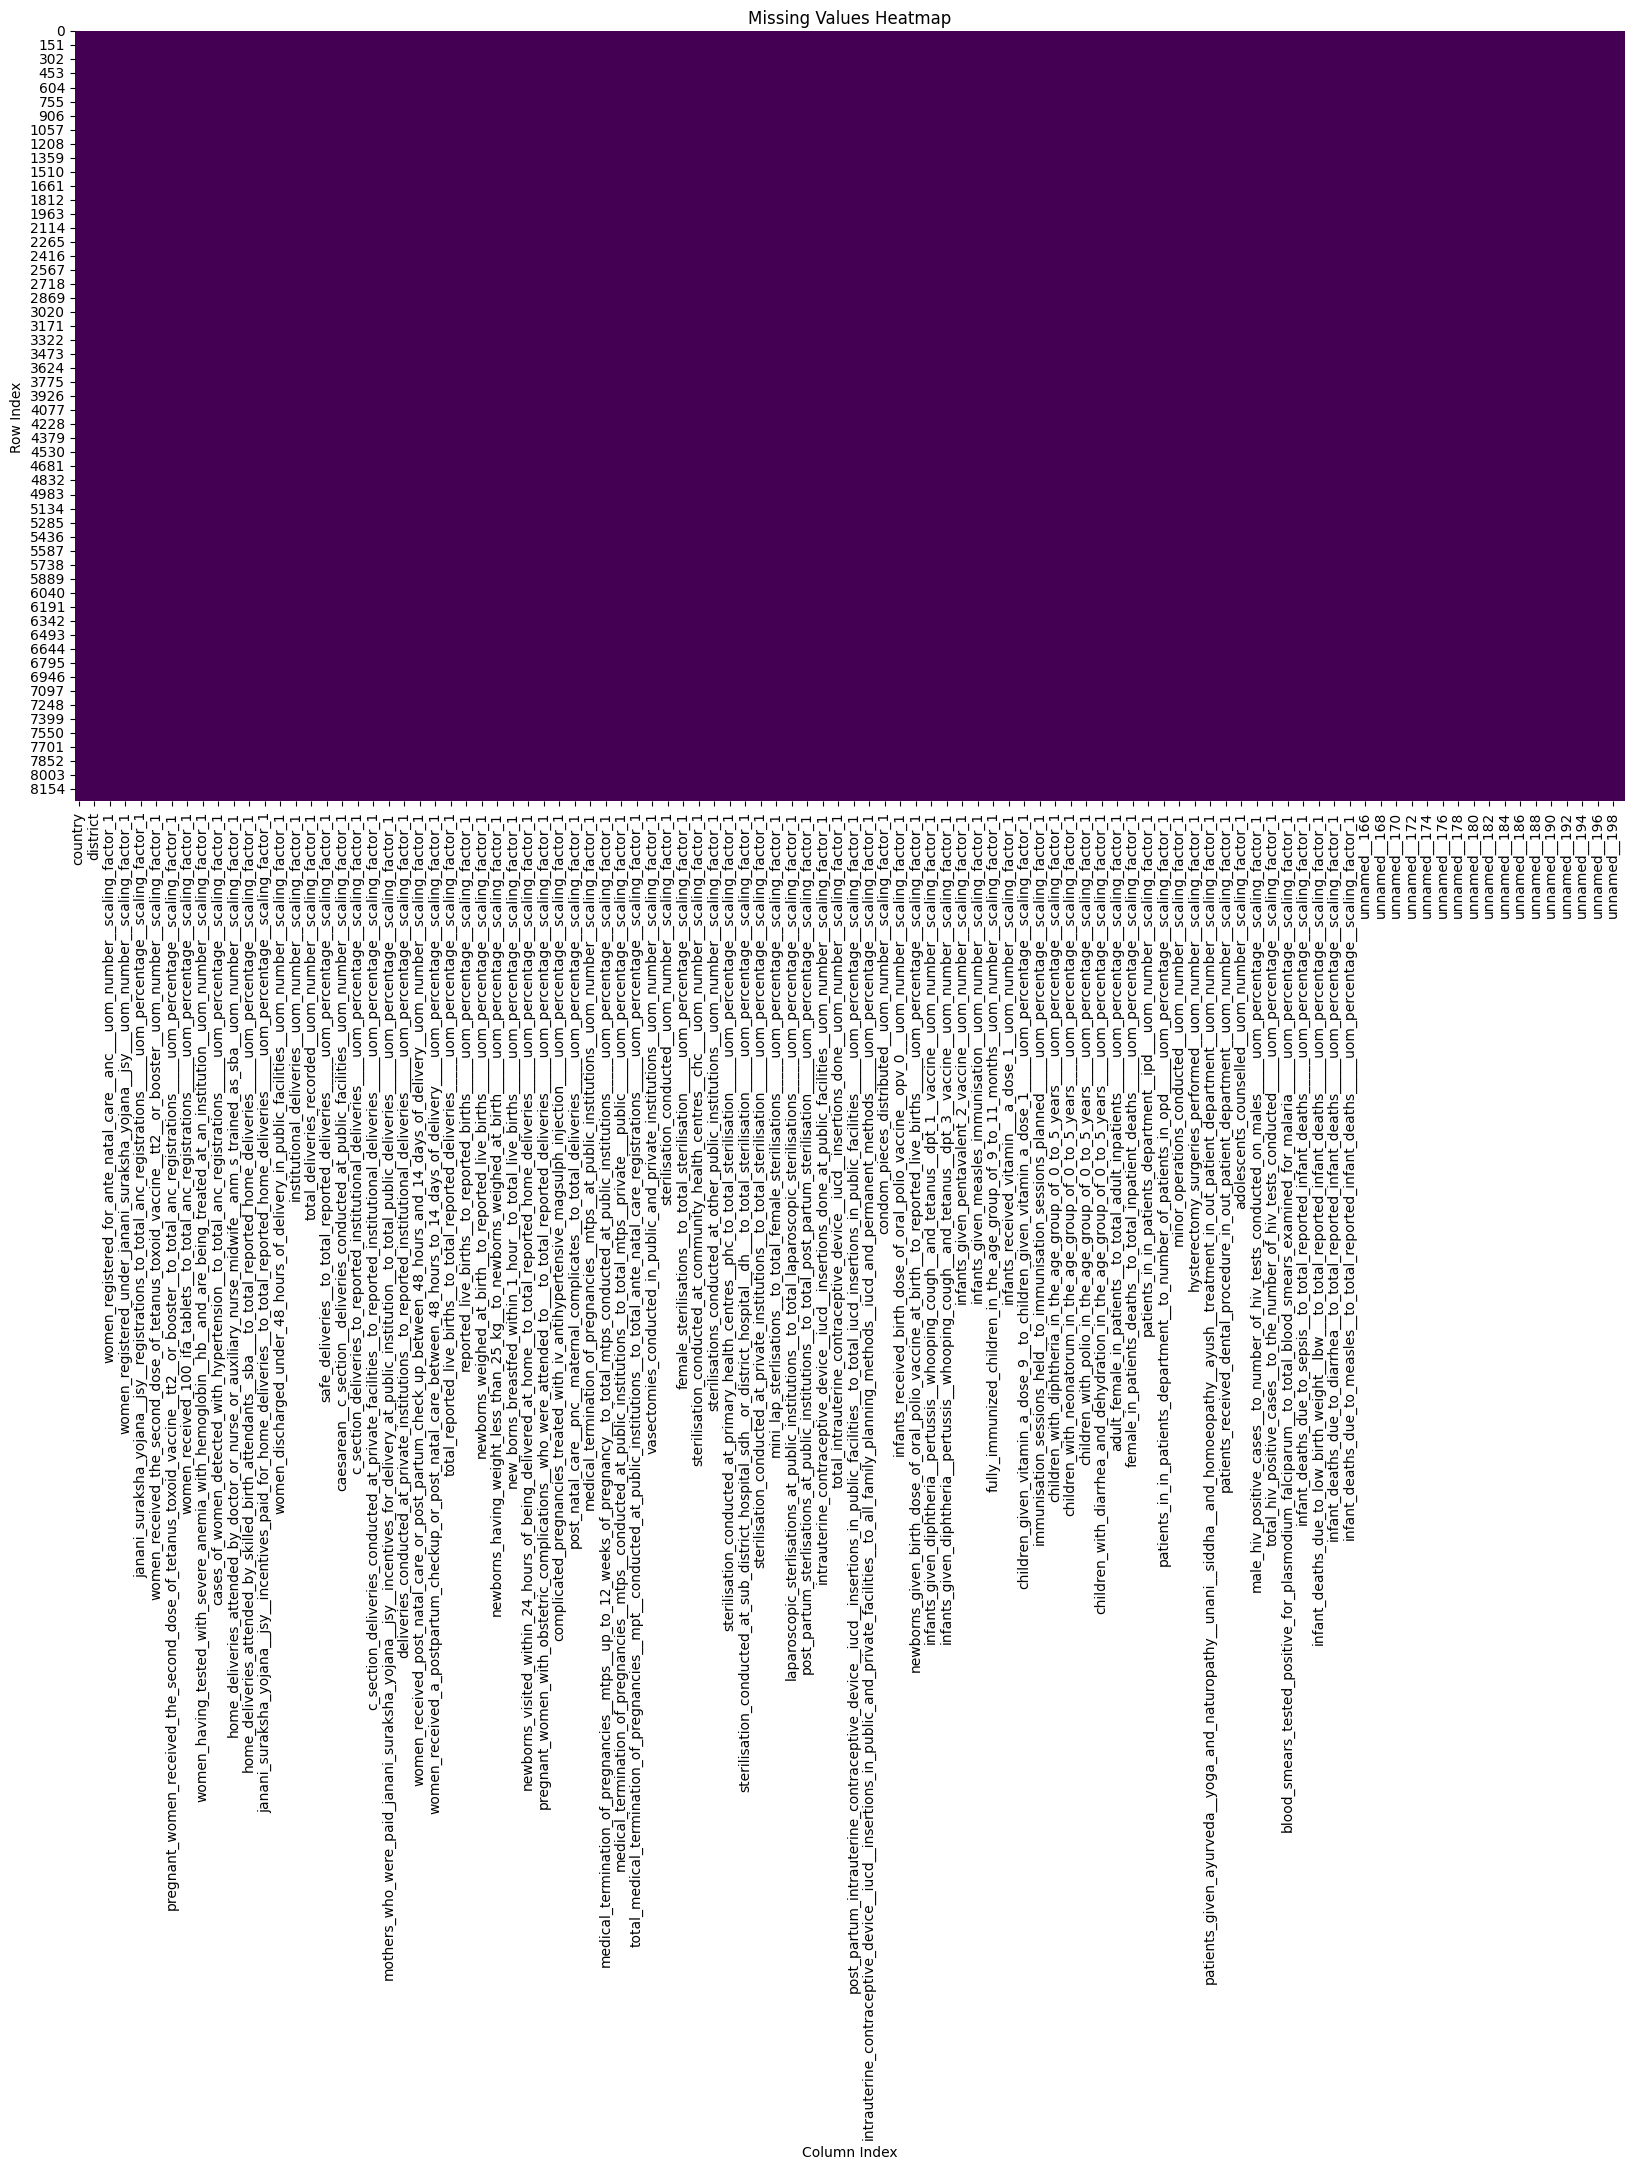

In [ ]:
# The 'year' column needs to be converted to a string for categorical analysis.
df['year'] = df['year'].astype(str)

# Calculate and display missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage (%)': missing_percentage})

print("Missing values in each column (Top 10):")
print(missing_data[missing_data['Missing Values'] > 0].head(10).to_markdown(numalign="left", stralign="left"))
print("\n")

# Visualize missing data
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.ylabel('Row Index')
plt.xlabel('Column Index')
plt.tight_layout()
plt.savefig('missing_values_heatmap.png')
print("A heatmap showing the distribution of missing values has been saved as 'missing_values_heatmap.png'.")

***Conclusion***
A significant number of columns have missing values, with some columns being completely empty (100% missing data). The heatmap visually confirms this by showing large vertical bands of missing data. The top 10 columns with missing data have 100% missing values, which indicates they contain no data at all.

# ***3. Univariate Analysis (Categorical and Numerical)***
# **Reason**
Univariate analysis focuses on a single variable at a time to understand its distribution and characteristics.

Categorical Variables (state, year): Provides insight into the data distribution across different states and over time.

Numerical Variables: Helps in understanding the central tendency (mean, median), spread (std dev), and shape of the distribution of key health indicators.

A bar chart showing the count of records by state has been saved as 'records_by_state.png'.


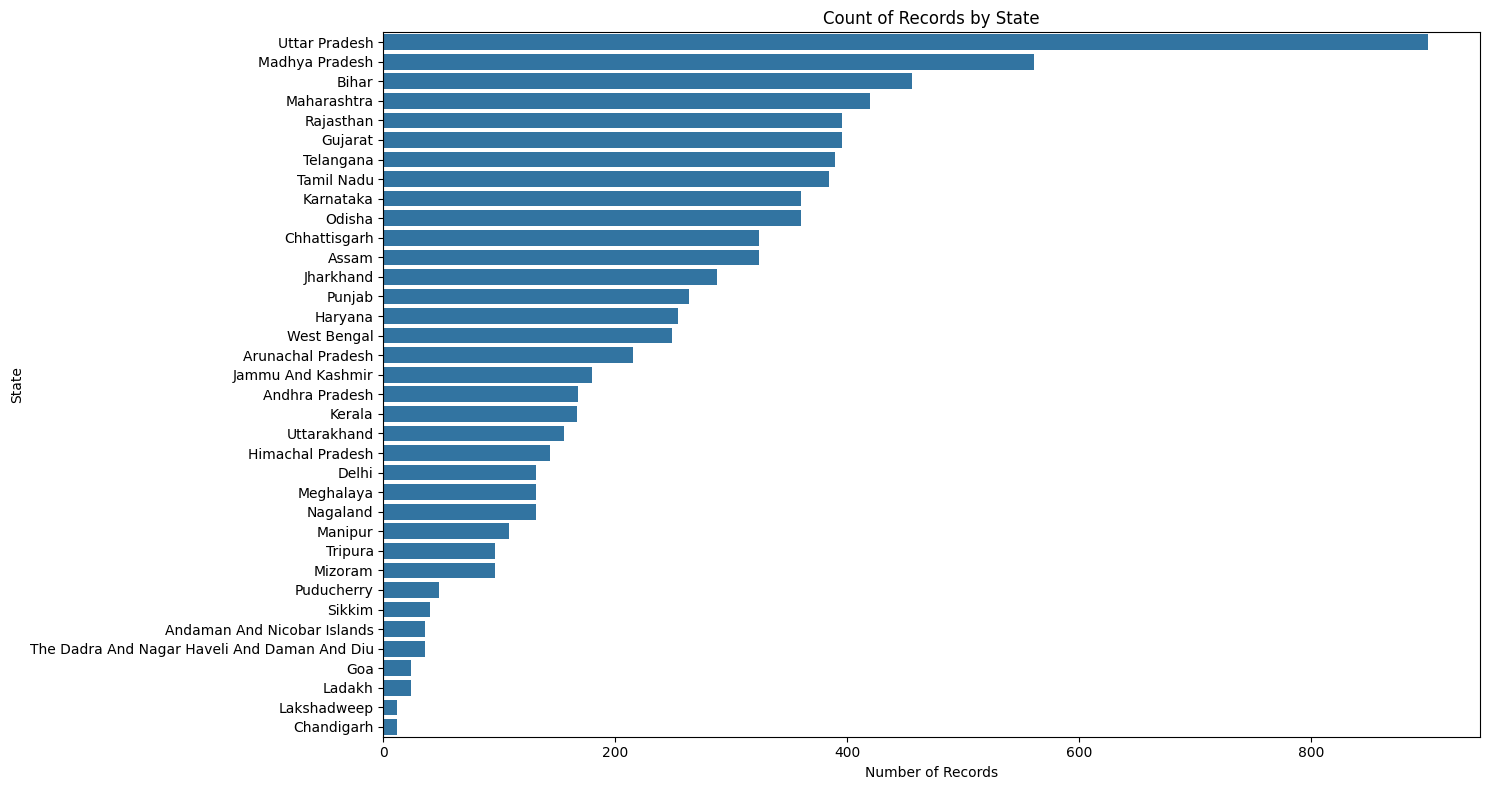

In [ ]:
# Use the correct column names from the data
anc_registrations_col = 'women_registered_for_ante_natal_care__anc___uom_number__scaling_factor_1'
institutional_deliveries_col = 'institutional_deliveries__uom_number__scaling_factor_1'

# Plotting the count of records for each 'state'
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='state', order=df['state'].value_counts().index)
plt.title('Count of Records by State')
plt.xlabel('Number of Records')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('records_by_state.png')
print("A bar chart showing the count of records by state has been saved as 'records_by_state.png'.")



A bar chart showing the count of records by year has been saved as 'records_by_year.png'.


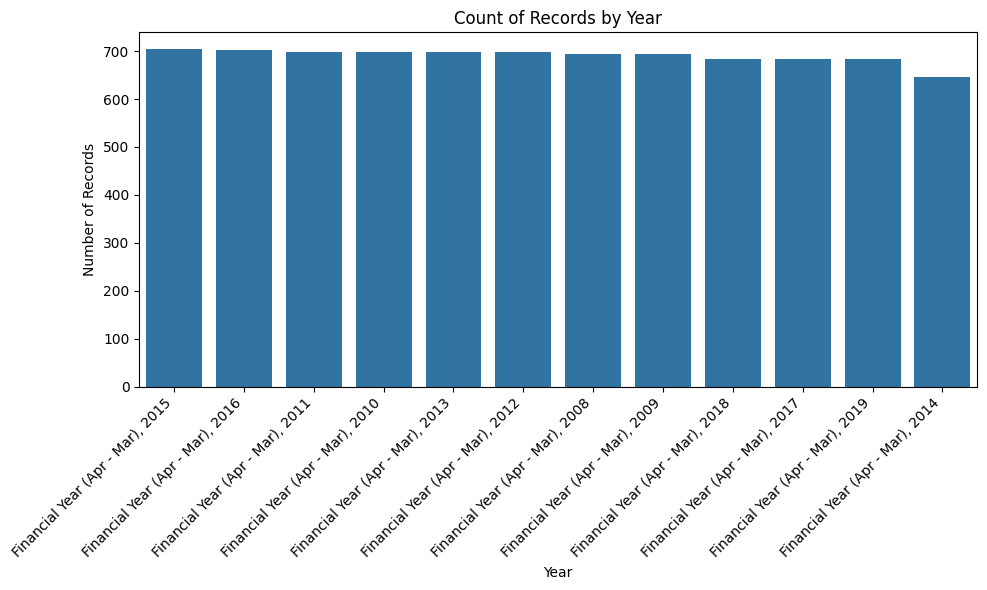

In [ ]:
# Plotting the count of records for each 'year'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', order=df['year'].value_counts().index)
plt.title('Count of Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('records_by_year.png')
print("A bar chart showing the count of records by year has been saved as 'records_by_year.png'.")



A histogram and a box plot for ANC Registrations have been saved as 'anc_registrations_distribution.png'.


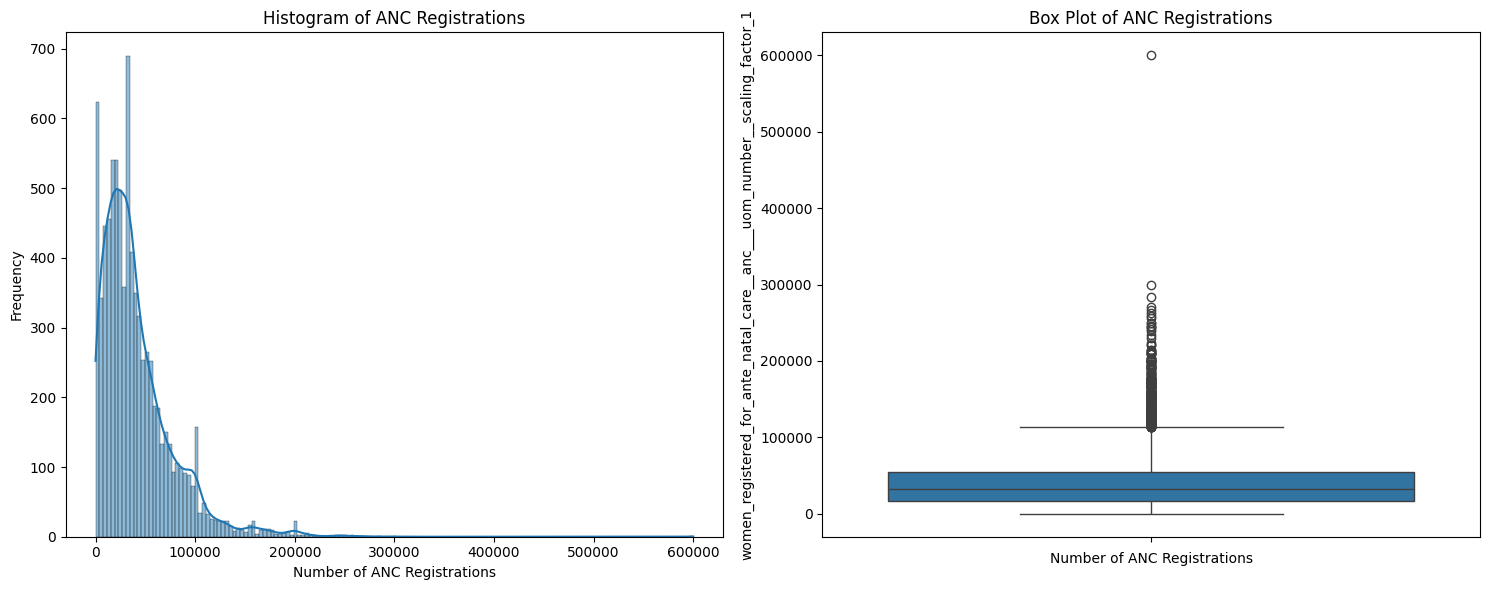

In [ ]:
# Histograms and box plots for ANC Registrations
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[anc_registrations_col], kde=True)
plt.title('Histogram of ANC Registrations')
plt.xlabel('Number of ANC Registrations')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(df[anc_registrations_col])
plt.title('Box Plot of ANC Registrations')
plt.xlabel('Number of ANC Registrations')
plt.tight_layout()
plt.savefig('anc_registrations_distribution.png')
print("A histogram and a box plot for ANC Registrations have been saved as 'anc_registrations_distribution.png'.")


A histogram and a box plot for Institutional Deliveries have been saved as 'institutional_deliveries_distribution.png'.


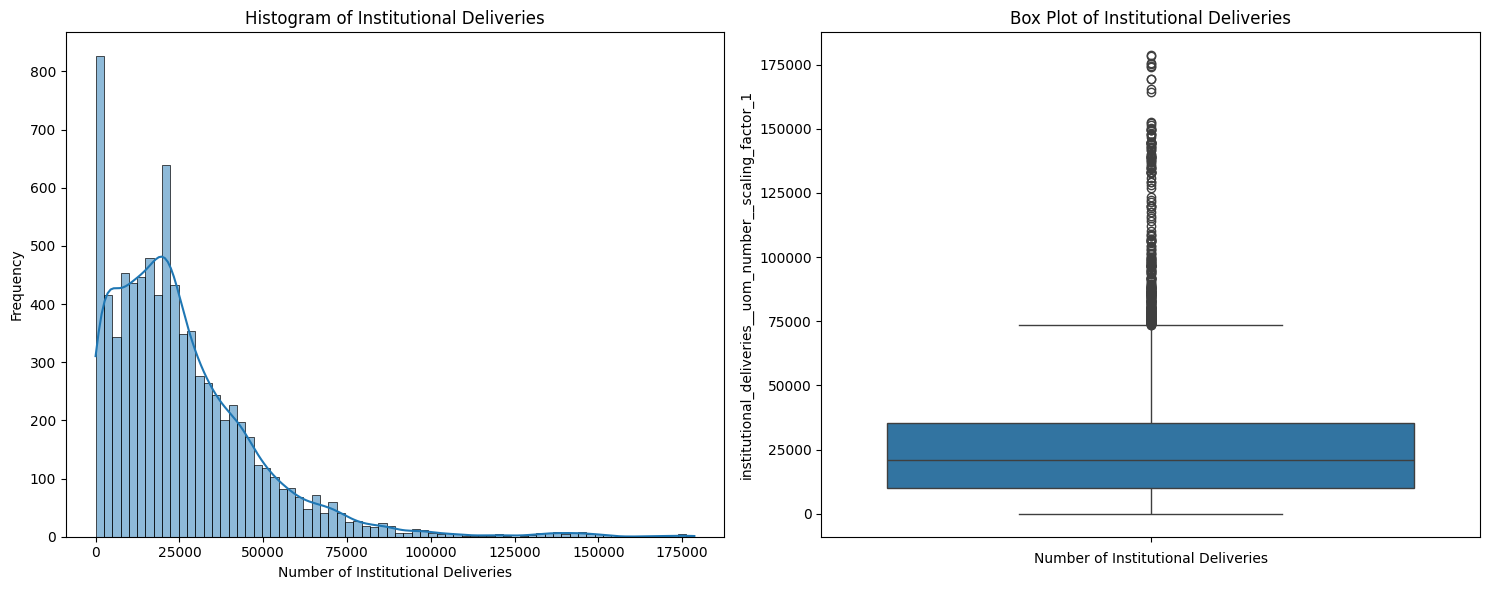

In [ ]:
# Histograms and box plots for Institutional Deliveries
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[institutional_deliveries_col], kde=True)
plt.title('Histogram of Institutional Deliveries')
plt.xlabel('Number of Institutional Deliveries')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(df[institutional_deliveries_col])
plt.title('Box Plot of Institutional Deliveries')
plt.xlabel('Number of Institutional Deliveries')
plt.tight_layout()
plt.savefig('institutional_deliveries_distribution.png')
print("A histogram and a box plot for Institutional Deliveries have been saved as 'institutional_deliveries_distribution.png'.")

# ***Conclusion***
By State and Year: The number of records varies significantly across different states and years, indicating that the dataset is not uniformly distributed.

ANC Registrations: The distribution is highly right-skewed, with a significant number of outliers. This suggests that while most districts have a low number of ANC registrations, a few have exceptionally high numbers.

Institutional Deliveries: Similar to ANC registrations, this variable is also right-skewed with many outliers. The majority of districts have a low number of institutional deliveries, but a few perform exceptionally well.


# ***4. Bivariate and Multivariate Analysis***
Reason
This analysis explores the relationships between multiple variables to uncover patterns, trends, and correlations.

Correlation Matrix: A heatmap of the correlation matrix helps visualize the relationships between key numerical variables. A high positive correlation (close to 1) suggests that as one variable increases, the other tends to increase as well.

Geographical and Time Trends: These plots show how key indicators vary by state and change over time, providing valuable insights into regional disparities and overall progress.

A heatmap showing the correlation matrix of key health indicators has been saved as 'correlation_matrix.png'.


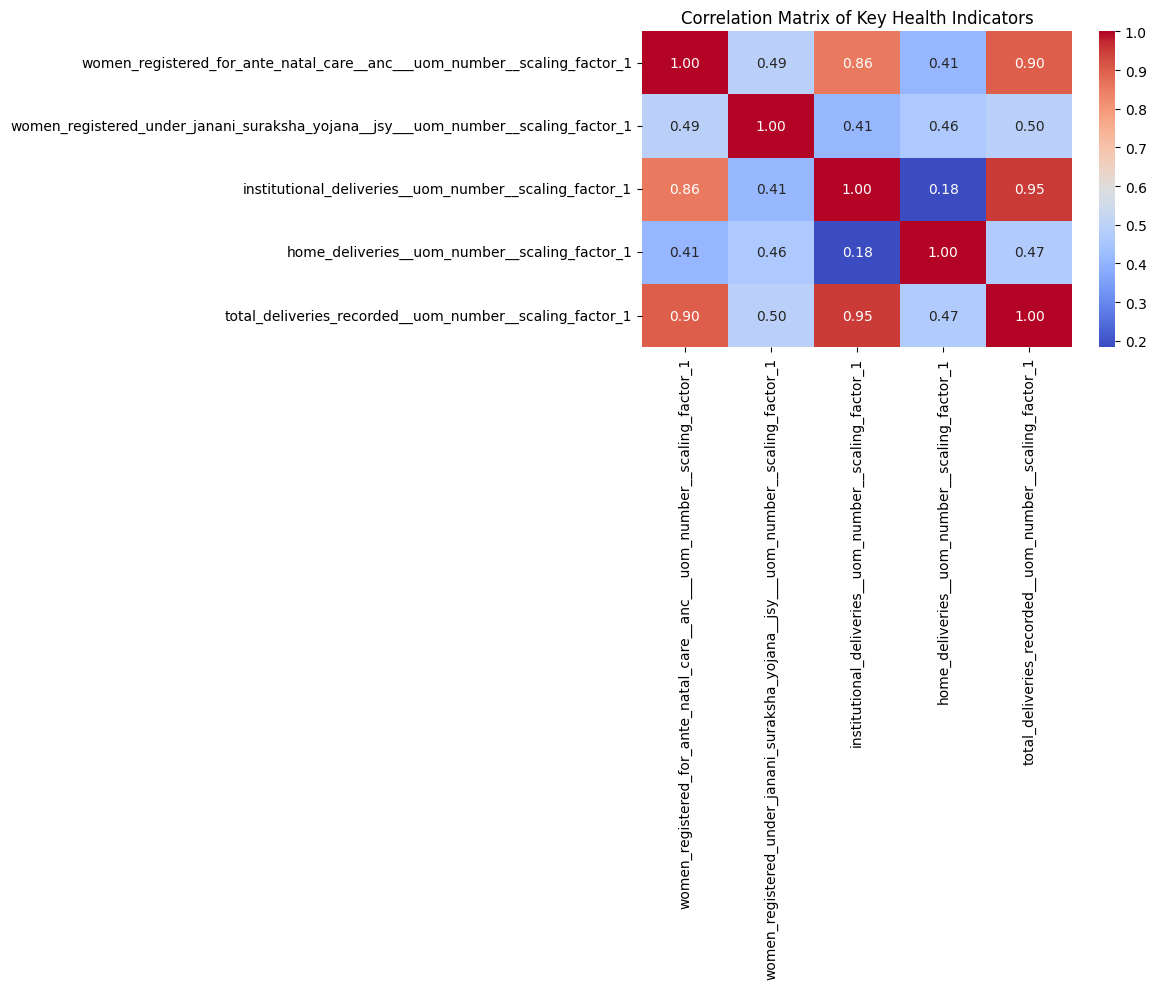

In [ ]:
# Bivariate Analysis and Multivariate Analysis
# These plots and correlations explore the relationships between different variables.
# Calculating the correlation matrix for a subset of numerical columns.
# This helps identify relationships between different health indicators.
cols_to_correlate = [
    'women_registered_for_ante_natal_care__anc___uom_number__scaling_factor_1',
    'women_registered_under_janani_suraksha_yojana__jsy___uom_number__scaling_factor_1',
    'institutional_deliveries__uom_number__scaling_factor_1',
    'home_deliveries__uom_number__scaling_factor_1',
    'total_deliveries_recorded__uom_number__scaling_factor_1'
]
correlation_matrix = df[cols_to_correlate].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Health Indicators')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
print("A heatmap showing the correlation matrix of key health indicators has been saved as 'correlation_matrix.png'.")



A bar chart showing total institutional deliveries by state has been saved as 'institutional_deliveries_by_state.png'.


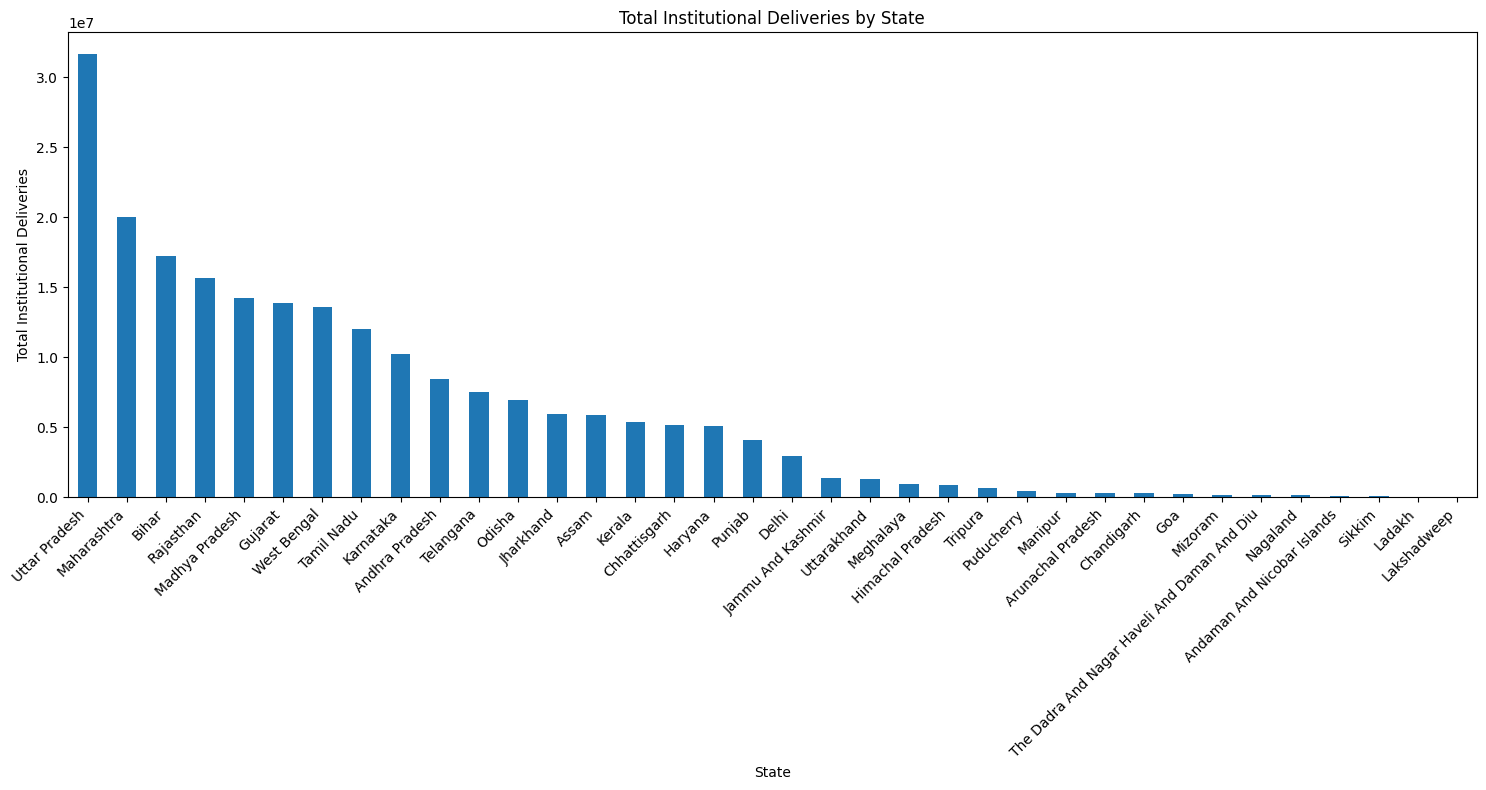

In [ ]:
# Bivariate Analysis - Geographical trends
# This helps visualize how key health indicators vary across different states.
# Grouping the data by state and calculating the total institutional deliveries.
state_deliveries = df.groupby('state')['institutional_deliveries__uom_number__scaling_factor_1'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
state_deliveries.plot(kind='bar')
plt.title('Total Institutional Deliveries by State')
plt.xlabel('State')
plt.ylabel('Total Institutional Deliveries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('institutional_deliveries_by_state.png')
print("A bar chart showing total institutional deliveries by state has been saved as 'institutional_deliveries_by_state.png'.")



A line plot showing average ANC registrations and institutional deliveries over time has been saved as 'time_trends.png'.


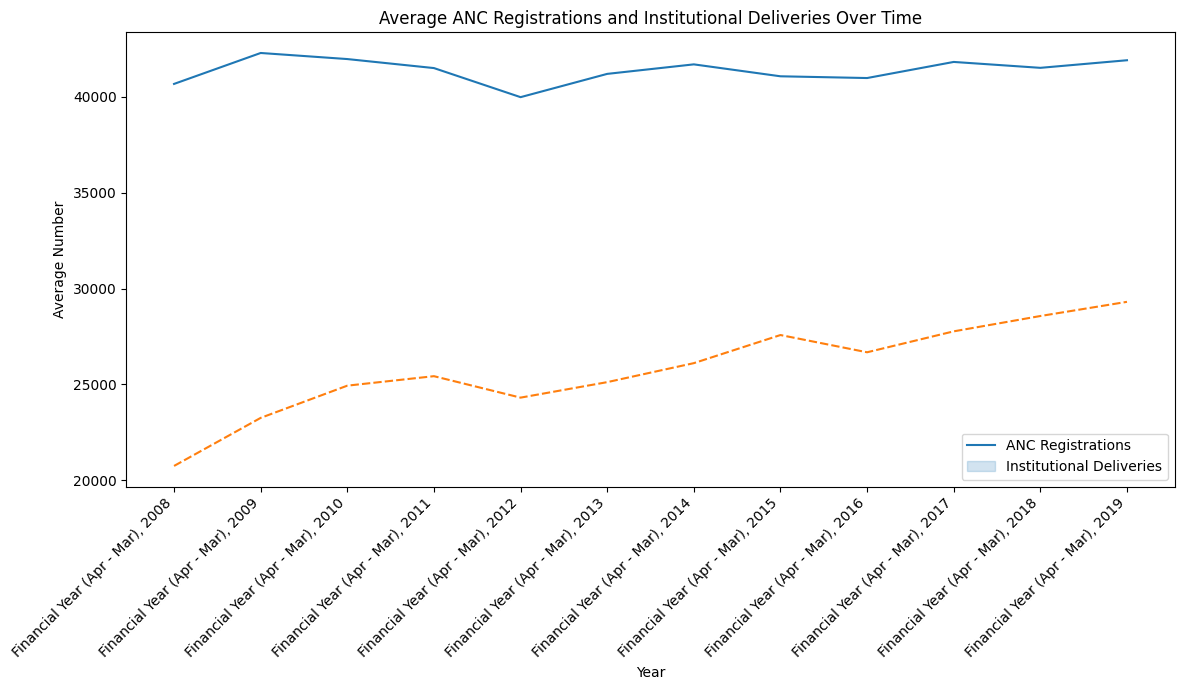

In [ ]:
# Bivariate Analysis - Time trends
# This helps visualize how key health indicators have changed over the years.
# Grouping the data by year and calculating the mean ANC registrations and institutional deliveries.
time_trends = df.groupby('year')[['women_registered_for_ante_natal_care__anc___uom_number__scaling_factor_1', 'institutional_deliveries__uom_number__scaling_factor_1']].mean()
time_trends.index = time_trends.index.str.replace('Financial Year \(Apr - Mar\), ', '')

plt.figure(figsize=(12, 7))
sns.lineplot(data=time_trends)
plt.title('Average ANC Registrations and Institutional Deliveries Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number')
plt.legend(labels=['ANC Registrations', 'Institutional Deliveries'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('time_trends.png')
print("A line plot showing average ANC registrations and institutional deliveries over time has been saved as 'time_trends.png'.")

# ***Conclusion***
Correlation Matrix: A strong positive correlation is observed between key indicators. For example, ANC registrations are highly correlated with JSY registrations, and institutional deliveries are highly correlated with total deliveries. This suggests that these metrics are interdependent.

Geographical Trends: The number of institutional deliveries varies significantly by state, highlighting regional differences in healthcare access and utilization.

Time Trends: There is a clear upward trend in both average ANC registrations and institutional deliveries over the years, indicating a positive development in maternal healthcare services and their adoption over time.

# **1. Scatter Plot of ANC Registrations vs. Institutional Deliveries**
Reason
This visualization is used to explore the relationship between two numerical variables. It provides a direct visual confirmation of the correlation between women_registered_for_ante_natal_care and institutional_deliveries, helping to identify the strength and nature of their relationship.

A scatter plot showing the relationship between ANC registrations and institutional deliveries has been saved as 'anc_vs_institutional_deliveries_scatterplot.png'.


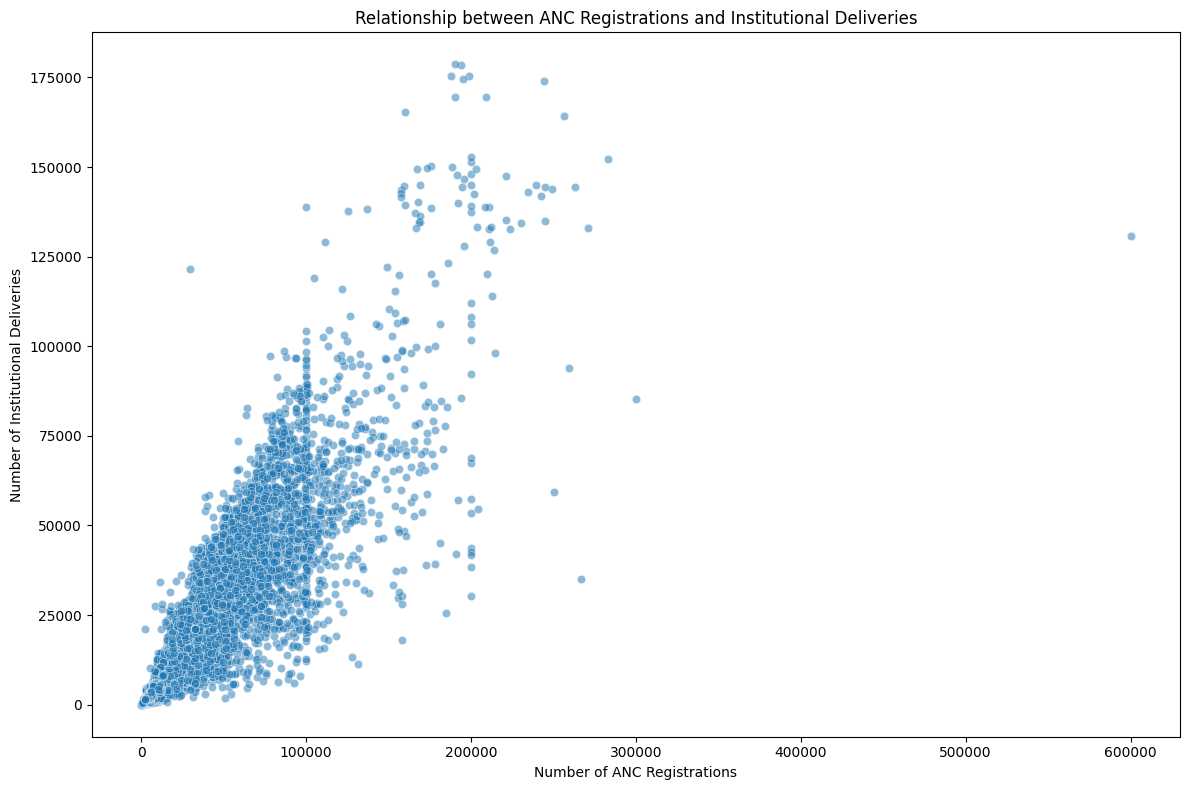

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and clean column names
df = pd.read_csv('cleaned_dataset.csv')
df.columns = df.columns.str.lower().str.replace('[^a-z0-9_]+', '_', regex=True).str.strip('_')

# Define the correct column names
anc_registrations_col = 'women_registered_for_ante_natal_care__anc___uom_number__scaling_factor_1'
institutional_deliveries_col = 'institutional_deliveries__uom_number__scaling_factor_1'

# Chart 1: Scatter plot of ANC Registrations vs. Institutional Deliveries
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=anc_registrations_col, y=institutional_deliveries_col, alpha=0.5)
plt.title('Relationship between ANC Registrations and Institutional Deliveries')
plt.xlabel('Number of ANC Registrations')
plt.ylabel('Number of Institutional Deliveries')
plt.tight_layout()
plt.savefig('anc_vs_institutional_deliveries_scatterplot.png')
print("A scatter plot showing the relationship between ANC registrations and institutional deliveries has been saved as 'anc_vs_institutional_deliveries_scatterplot.png'.")

# **Conclusion**
The scatter plot confirms a strong positive linear relationship between the number of ANC registrations and institutional deliveries. This indicates that as more women register for antenatal care, the number of institutional deliveries tends to increase. The presence of some outliers suggests that a few districts have exceptionally high numbers for both metrics.

# **2. C-section Deliveries in Public vs. Private Facilities by State**
Reason
This visualization provides a detailed breakdown of C-section deliveries across different states and highlights the contribution of public versus private facilities. This is a key metric for understanding the healthcare infrastructure and access to surgical care in various regions.

A stacked bar chart showing C-section deliveries in public vs. private facilities by state has been saved as 'c_section_by_state_stacked_bar.png'.


<Figure size 1500x1000 with 0 Axes>

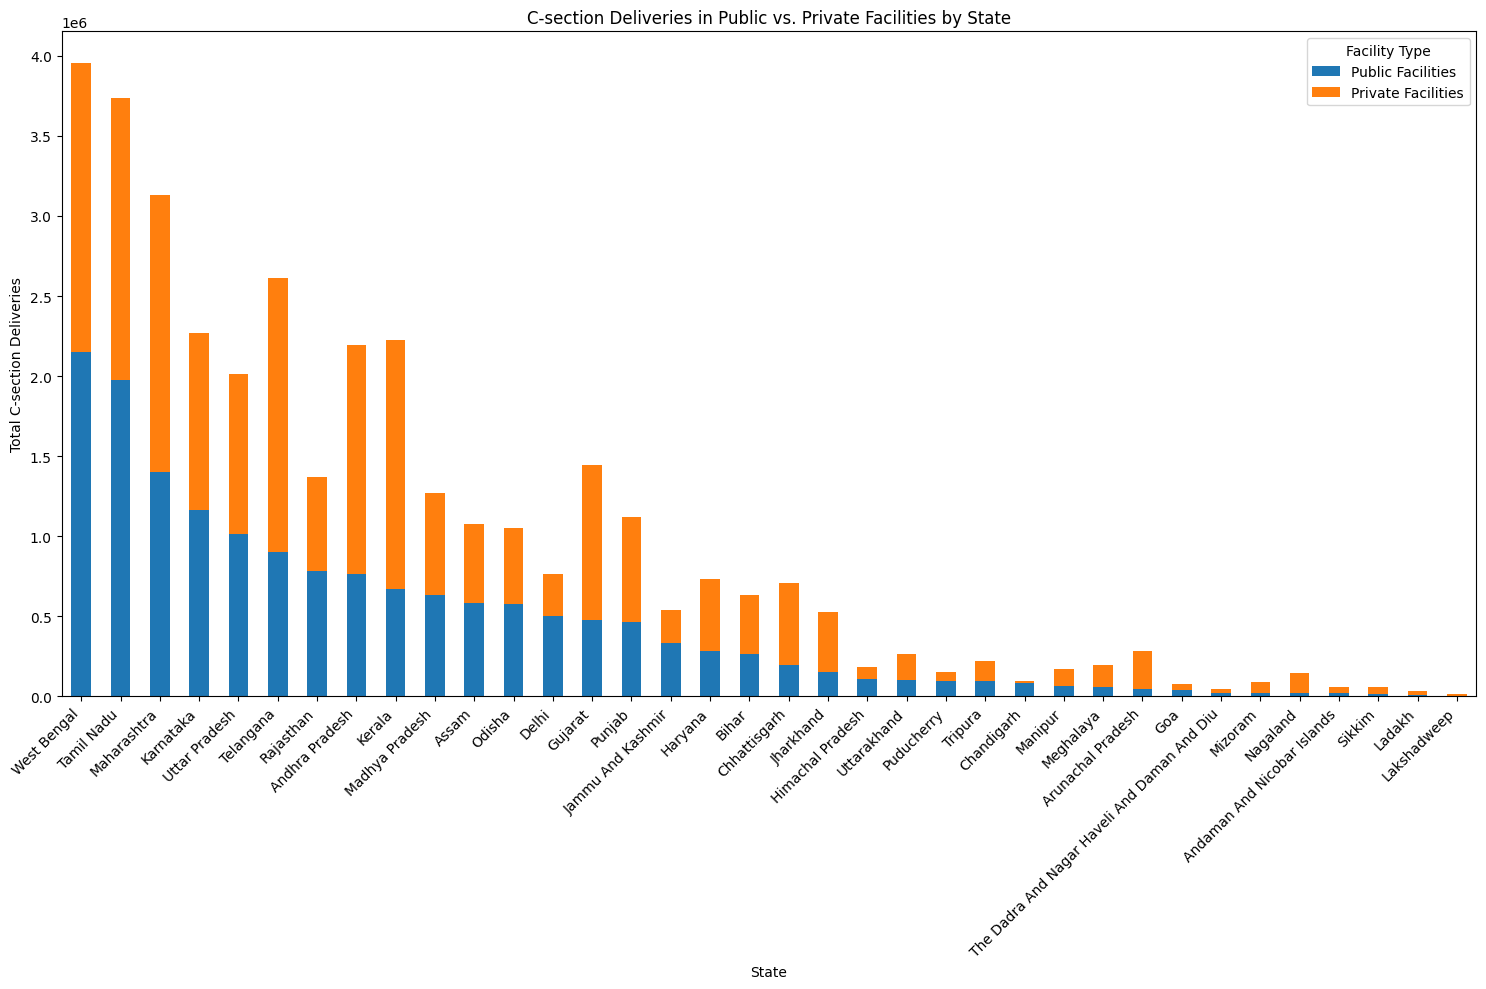

In [ ]:
# Define the correct column names for C-section deliveries
c_section_public_col = 'caesarean__c_section__deliveries_conducted_at_public_facilities__uom_number__scaling_factor_1'
c_section_private_col = 'caesarean__c_section__deliveries_conducted_at_private_facilities__uom_number__scaling_factor_1'

# Chart 2: Stacked bar chart of C-section Deliveries in Public vs. Private Facilities by State
c_section_by_state = df.groupby('state')[[c_section_public_col, c_section_private_col]].sum().sort_values(by=c_section_public_col, ascending=False)
c_section_by_state.rename(columns={c_section_public_col: 'Public Facilities', c_section_private_col: 'Private Facilities'}, inplace=True)

plt.figure(figsize=(15, 10))
c_section_by_state.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('C-section Deliveries in Public vs. Private Facilities by State')
plt.xlabel('State')
plt.ylabel('Total C-section Deliveries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Facility Type')
plt.tight_layout()
plt.savefig('c_section_by_state_stacked_bar.png')
print("A stacked bar chart showing C-section deliveries in public vs. private facilities by state has been saved as 'c_section_by_state_stacked_bar.png'.")

# **Conclusion**
The stacked bar chart clearly shows that the number of C-section deliveries varies significantly across different states. In some states, such as Uttar Pradesh and Maharashtra, C-sections are performed much more frequently in public facilities, while in others, such as Madhya Pradesh and Tamil Nadu, they are more prevalent in private institutions. This chart highlights the differences in healthcare service provision across states.

# ***1. Relationship between ANC and JSY Registrations***
# **Reason**
This scatter plot provides a direct visualization of the relationship between women_registered_for_ante_natal_care and women_registered_under_janani_suraksha_yojana. It confirms the strong positive correlation observed in the correlation matrix, showing that districts with higher ANC registrations also tend to have higher JSY registrations, suggesting a successful outreach or co-registration.

A scatter plot showing the relationship between ANC and JSY registrations has been saved as 'anc_vs_jsy_scatterplot.png'.


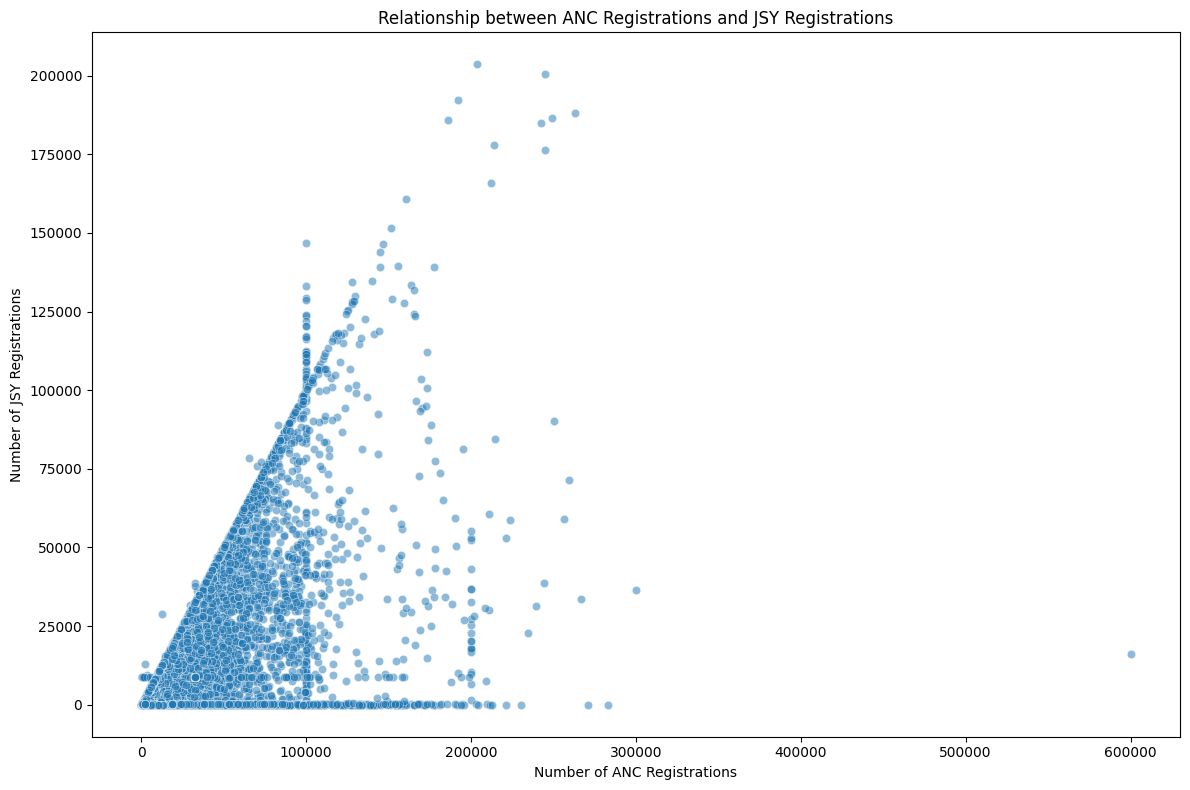

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and clean column names
df = pd.read_csv('cleaned_dataset.csv')
df.columns = df.columns.str.lower().str.replace('[^a-z0-9_]+', '_', regex=True).str.strip('_')

# Define the correct column names based on the previous inspection
anc_registrations_col = 'women_registered_for_ante_natal_care__anc___uom_number__scaling_factor_1'
jsy_registrations_col = 'women_registered_under_janani_suraksha_yojana__jsy___uom_number__scaling_factor_1'

# Chart: Scatter plot of ANC Registrations vs. JSY Registrations
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=anc_registrations_col, y=jsy_registrations_col, alpha=0.5)
plt.title('Relationship between ANC Registrations and JSY Registrations')
plt.xlabel('Number of ANC Registrations')
plt.ylabel('Number of JSY Registrations')
plt.tight_layout()
plt.savefig('anc_vs_jsy_scatterplot.png')
print("A scatter plot showing the relationship between ANC and JSY registrations has been saved as 'anc_vs_jsy_scatterplot.png'.")

# **Conclusion**
The scatter plot clearly shows a strong positive relationship between ANC and JSY registrations. The data points cluster along an upward trend, confirming that these two metrics are highly correlated. This suggests that the JSY program is effectively reaching women who are already part of the antenatal care system.

# **2. Ratio of Institutional Deliveries to ANC Registrations by State**
Reason
To provide a more normalized view of state performance, this chart visualizes the ratio of institutional deliveries to ANC registrations. This metric helps understand which states are most effective at converting ANC registrations into institutional deliveries, which can be a proxy for the effectiveness of their healthcare system and outreach programs.

A bar chart showing the ratio of institutional deliveries to ANC registrations by state has been saved as 'delivery_to_anc_ratio_by_state.png'.


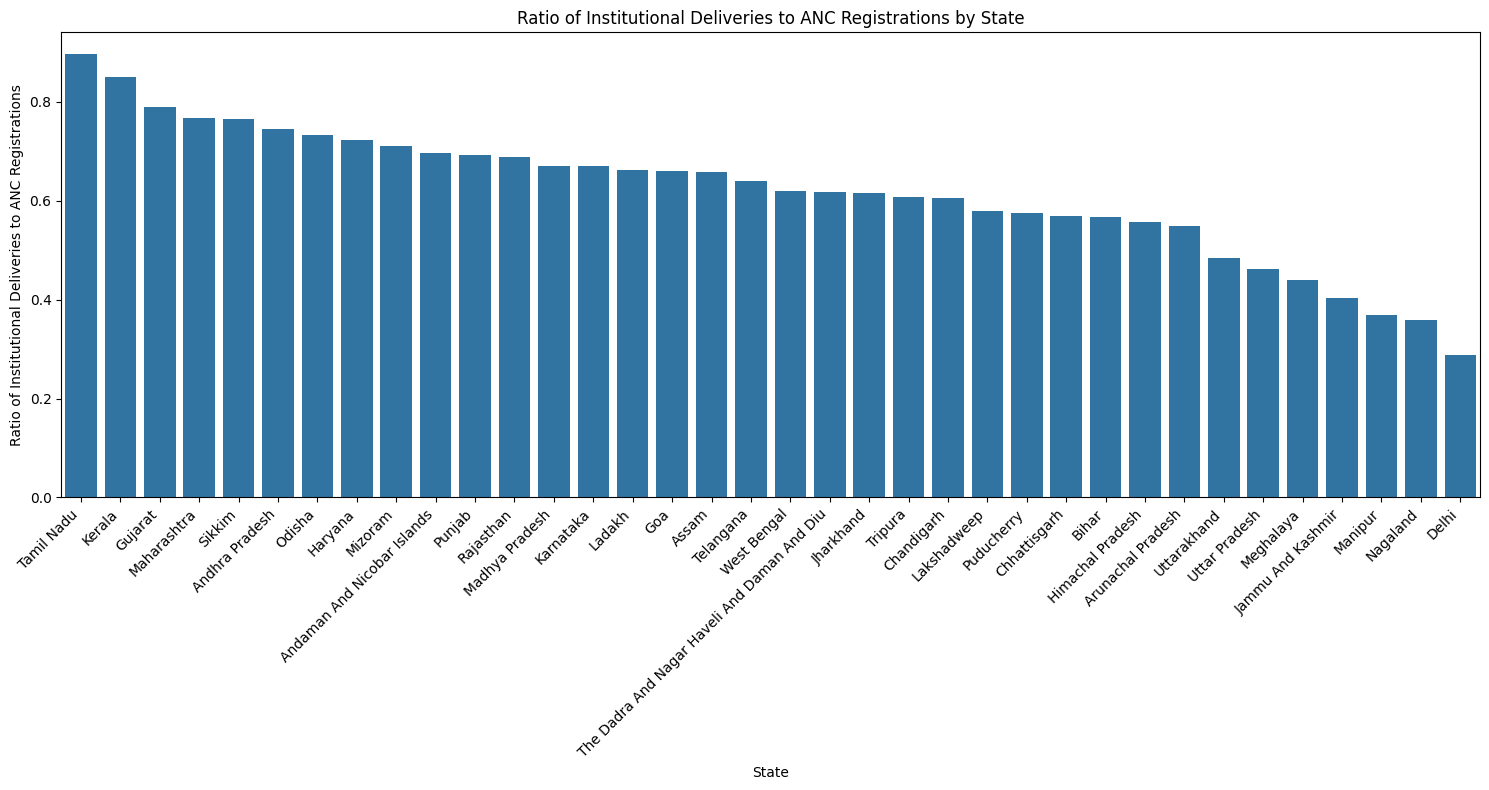

In [ ]:
# Define the correct column names
anc_registrations_col = 'women_registered_for_ante_natal_care__anc___uom_number__scaling_factor_1'
institutional_deliveries_col = 'institutional_deliveries__uom_number__scaling_factor_1'

# Chart: Bar plot of the ratio of institutional deliveries to ANC registrations by state
state_data = df.groupby('state')[[anc_registrations_col, institutional_deliveries_col]].sum().reset_index()
state_data['delivery_to_anc_ratio'] = state_data[institutional_deliveries_col] / state_data[anc_registrations_col]

state_data_sorted = state_data.sort_values(by='delivery_to_anc_ratio', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(data=state_data_sorted, x='state', y='delivery_to_anc_ratio')
plt.title('Ratio of Institutional Deliveries to ANC Registrations by State')
plt.xlabel('State')
plt.ylabel('Ratio of Institutional Deliveries to ANC Registrations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('delivery_to_anc_ratio_by_state.png')
print("A bar chart showing the ratio of institutional deliveries to ANC registrations by state has been saved as 'delivery_to_anc_ratio_by_state.png'.")

# **Conclusion**
The bar chart shows significant disparities in the delivery_to_anc_ratio across states. This indicates that some states are much more effective at ensuring that pregnant women who receive antenatal care also give birth in an institution. These states could serve as models for others looking to improve their maternal healthcare outcomes. This normalized view is more insightful than simply looking at total numbers, as it accounts for regional variations in the number of pregnant women.